## Base de Dados do IPEA - Chamada Pública 70/2021

Este notebook apresenta uma análise exploratória da base de dados simulacao_ipea.csv, fornecida para a chamada pública IPEA 70/2021. Os códigos para se chegar às respostas das questões do Teste estão devidamente registrados e documentados neste arquivo.

Autora: Mariana Tasca\
Data: 08/11/2021

Pacotes necessários para a análise exploratória:

In [47]:
import pandas as pd
import pymysql
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Carregando o arquivo de origem:

In [8]:
tabIpea = pd.read_csv('simulacao_ipea.csv', encoding = 'latin-1', sep=';')

In [12]:
print('A tabela possui', tabIpea.shape[0], 'linhas e', tabIpea.shape[1], 'colunas')

A tabela possui 10000000 linhas e 8 colunas


Removendo todos os registros onde existe pelo menos uma variável em branco:

In [ ]:
tabIpea_semNA = tabIpea.dropna()

In [107]:
tabIpea_semNA.shape

(7129783, 8)

Apesar de ter realizado a operação de remoção dos brancos aqui, todas as análises a seguir são feitas com a base completa, sem remoção de campos nulos.

Visualizando uma porção dos dados:

In [9]:
tabIpea.head()

,ano,orgao,idade,sexo,uf,escolaridade,raca,remuneracao
0,1993,CNC,79,NaN,TO,NaN,Indigena,6799.73
1,2007,Uesb,33,F,MS,NaN,Branco,9843.94
2,2011,Ufma,60,M,MG,5.0,Preto,7416.29
3,2000,Ifad,34,M,AC,3.0,Pardo,9416.94
4,2013,Uniube,67,F,RN,5.0,Indigena,2769.03


Conhecendo as estatísticas dos dados carregados:

In [10]:
tabIpea.describe()

,ano,idade,escolaridade,remuneracao
count,1.000000e+07,1.000000e+07,9.333746e+06,1.000000e+07
mean,2.005705e+03,4.654254e+01,3.250013e+00,5.430440e+03
std,8.572433e+00,1.701535e+01,1.056289e+00,2.691536e+03
min,1.990000e+03,1.800000e+01,1.000000e+00,8.321300e+02
25%,1.999000e+03,3.300000e+01,3.000000e+00,3.125510e+03
50%,2.006000e+03,4.500000e+01,4.000000e+00,5.420090e+03
75%,2.013000e+03,6.000000e+01,4.000000e+00,7.715490e+03
max,2.019000e+03,8.400000e+01,5.000000e+00,2.999579e+04


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000276977431D0>,
      dtype=object)

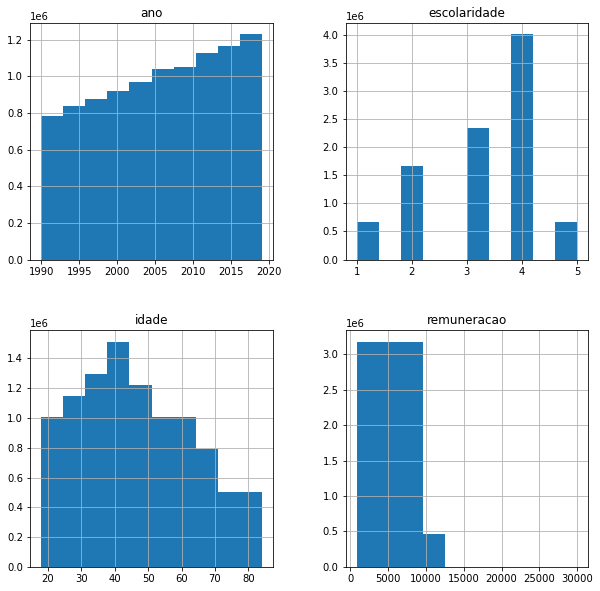

In [13]:
# histogramas
tabIpea.hist(sharex=False, sharey=False, xlabelsize=10, ylabelsize=10, figsize=(10,10))

Procurando correlações entre as variáveis:

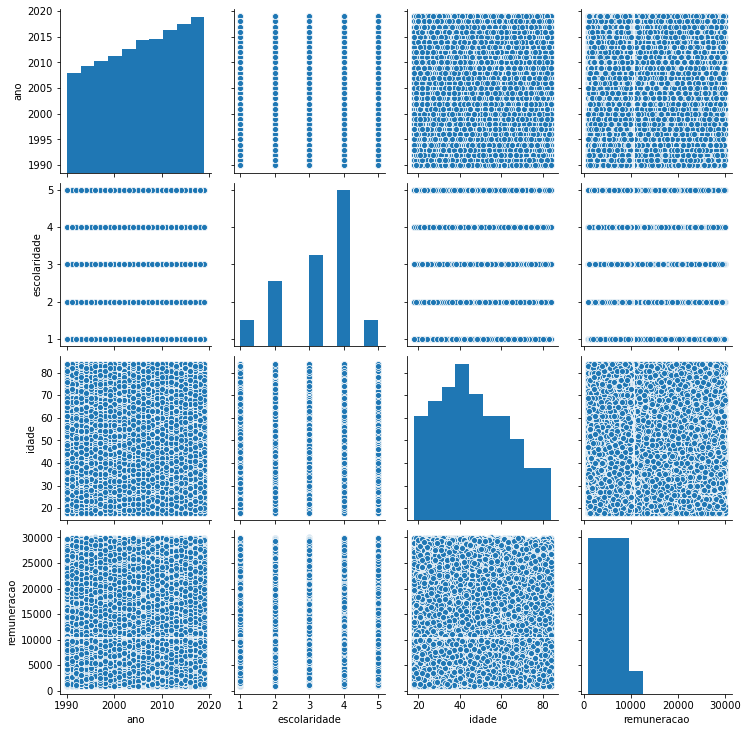

In [16]:
variaveis = tabIpea[['ano', 'escolaridade', 'idade', 'remuneracao']]
sns.pairplot(variaveis)

Curioso que não parece haver correlação entre a remuneração com escolaridade ou idade.

### Observações:

Os dados dessa base são curiosos. Fazendo algumas análises no Power BI, verifiquei que a quantidade de pessoas registradas ao longo do tempo, bem como o somatório das remunerações aumenta. Porém, a média salarial é a mesma em 30 anos. E as distribuições de salários entre os gêneros e raças também não possuem grandes variações ao longo do tempo. Também não existe grande difereça entre as médias salariais para os diferentes níveis de escolaridade. Me pareceu uma base com dados sintéticos, distribuídos de forma bastante uniforme.

## Questões Formulário IPEA - Chamada Pública

#### 4. Qual é a quantidade de trabalhadores do sexo masculino com idade superior a 50 anos, registrados no estado da Bahia, no ano de 2019?

In [18]:
q4 = tabIpea.loc[(tabIpea['sexo'] == 'M') & (tabIpea['idade'] > 50) & (tabIpea['uf'] == 'BA') & (tabIpea['ano'] == 2019)]

In [19]:
q4.shape

(3055, 8)

##### Resposta 4: 3.055 trabalhadores

#### 5. Qual ano e estabelecimento apresenta a maior quantidade de registros do sexo feminino? 

In [85]:
# Filtrando somente sexo feminino
q5 = tabIpea.loc[tabIpea['sexo'] == 'F']

# Agrupando por ano e órgão
q5 = q5.groupby(['ano', 'orgao']).size().reset_index(name='counts')

In [90]:
# Ordenando as quantidades em ordem decrescente
q5.sort_values(by=['counts'], ascending=False)

,ano,orgao,counts
9246,2017,ANA,875
9471,2017,SBB,875
9814,2018,SBF,872
9588,2018,ANA,858
9813,2018,SBB,832
...,...,...,...
23,1990,Abia,209
253,1990,UEM,209
312,1990,UnB,207
490,1991,Funceme,206


##### Resposta 5: 2017 ANA e 2017 SBB, com 875 trabalhadores.

#### 6. Sabendo-se que o nível de escolaridade de um trabalhador vai de 1 até 5, qual é o percentual de trabalhadores, registrados no estabelecimento Ipea, com escolaridade nível 4 no ano de 2015?

In [63]:
# Filtrando somente Ipea e 2015
q6 = tabIpea.loc[(tabIpea['orgao'] == 'Ipea') & (tabIpea['ano'] == 2015)]

In [66]:
# Quantidade de pessoas com esse filtro
qtdPessoas = q6.shape[0]
print('Existem', qtdPessoas , 'pessoas no órgão Ipea em 2015')

Existem 1118 pessoas no órgão Ipea em 2015


In [67]:
# Agrupando por Escolaridade
q6 = q6.groupby(['escolaridade']).size().reset_index(name='counts')

In [68]:
q6

,escolaridade,counts
0,1.0,80
1,2.0,169
2,3.0,250
3,4.0,448
4,5.0,87


<function matplotlib.pyplot.show(*args, **kw)>

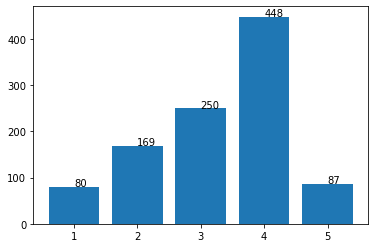

In [69]:
plt.bar(q6['escolaridade'], q6['counts'])

for index,data in enumerate(q6['counts']):
    plt.text( x = index + 1, y = data + 1 , s=f"{data}" , fontdict=dict(fontsize=10))

plt.show

In [70]:
q6['counts'][3]

448

In [105]:
print('O percentual de trabalhadores com nível de escolaridade 4 no Ipea em 2015 é de', q6['counts'][3]/qtdPessoas*100, '%')

O percentual de trabalhadores com nível de escolaridade 4 no Ipea em 2015 é de 40.07155635062612 %


##### Resposta Q6: Considerando todos os registros da base, sem remover nenhum registro com informações em branco (de nenhuma variável).

Usando agora a base sem dados em branco (foram removidos todos os registros onde havia pelo menos um campo em branco)

In [108]:
# Filtrando somente Ipea e 2015
q6a = tabIpea_semNA.loc[(tabIpea_semNA['orgao'] == 'Ipea') & (tabIpea_semNA['ano'] == 2015)]

In [109]:
# Quantidade de pessoas com esse filtro
qtdPessoasa = q6a.shape[0]
print('Existem', qtdPessoasa , 'pessoas no órgão Ipea em 2015')

Existem 795 pessoas no órgão Ipea em 2015


In [110]:
# Agrupando por Escolaridade
q6a = q6a.groupby(['escolaridade']).size().reset_index(name='counts')

<function matplotlib.pyplot.show(*args, **kw)>

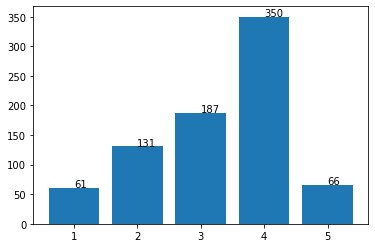

In [111]:
plt.bar(q6a['escolaridade'], q6a['counts'])

for index,data in enumerate(q6a['counts']):
    plt.text( x = index + 1, y = data + 1 , s=f"{data}" , fontdict=dict(fontsize=10))

plt.show

In [112]:
print('O percentual de trabalhadores com nível de escolaridade 4 no Ipea em 2015 é de', q6a['counts'][3]/qtdPessoasa*100, '%')

O percentual de trabalhadores com nível de escolaridade 4 no Ipea em 2015 é de 44.0251572327044 %


#### 7. Ao analisar os números de mulheres registradas no estabelecimento UFSJ, apenas para o ano de 2010, qual raça apresenta a menor quantidade de registros? Obs: desconsiderar registros sem a raça declarada.

In [75]:
# Filtrando somente UFSJ e 2010
q7 = tabIpea.loc[(tabIpea['orgao'] == 'UFSJ') & (tabIpea['ano'] == 2010) & (tabIpea['sexo'] == 'F')]

In [77]:
# Agrupando por Raça
q7 = q7.groupby(['raca']).size().reset_index(name='counts')

In [78]:
q7

,raca,counts
0,Amarelo,25
1,Branco,114
2,Indigena,26
3,Pardo,85
4,Preto,53


<function matplotlib.pyplot.show(*args, **kw)>

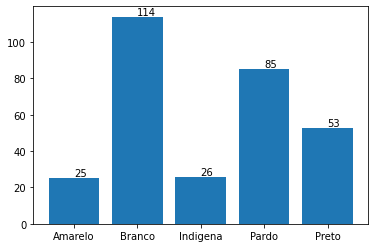

In [84]:
plt.bar(q7['raca'], q7['counts'])

for index, data in enumerate(q7['counts']):
    plt.text( x = index, y = data + 1 , s=f"{data}" , fontdict=dict(fontsize=10))

plt.show

##### Resposta 7: Raça Amarela

#### 8. Carregar um gráfico, preferencialmente nos formatos HTML, PNG, JPEG, e PDF, contendo uma série temporal de 1985 até 2019, que trate sobre a diferença de sexo e raça. Você pode explorar as variáveis que achar mais relevantes.

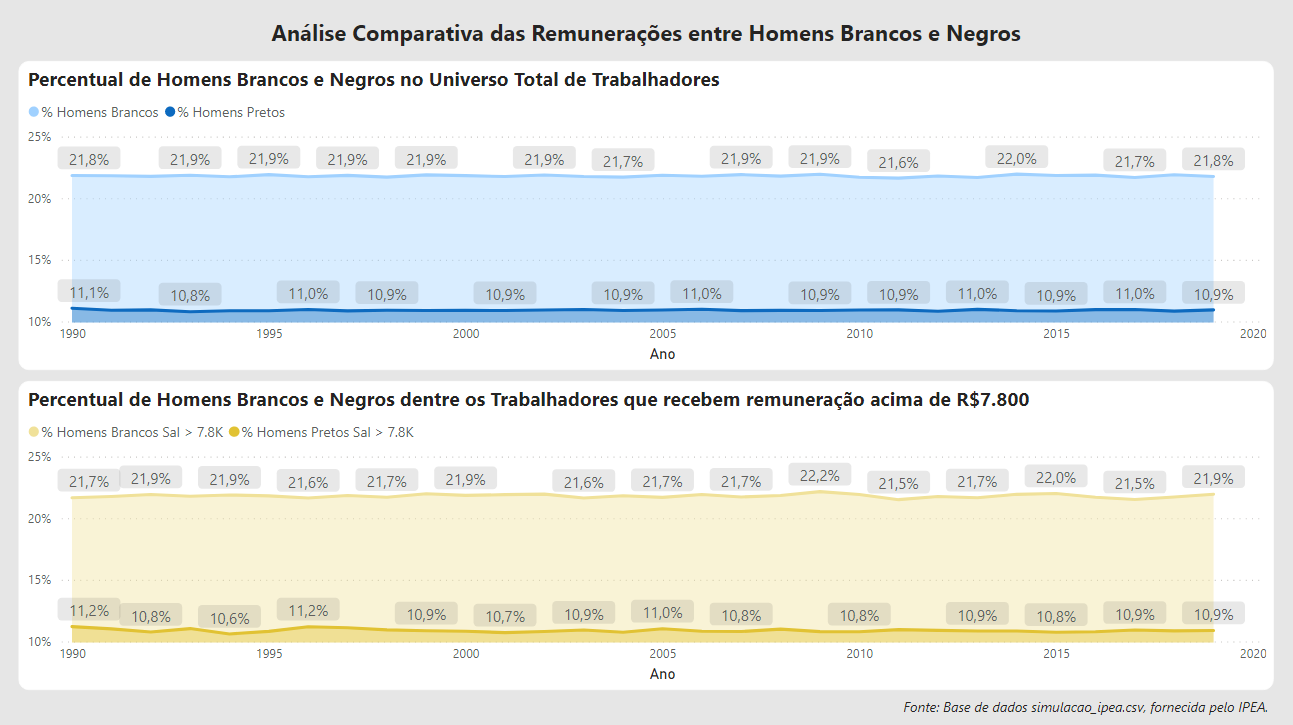

In [103]:
from IPython.display import Image
Image("graf_comparacao_remuneracao.png")

Este gráfico foi gerado na ferramenta Power BI, da Microsoft.

#### 9. Faça um pequeno texto explicativo sobre o gráfico gerado na questão anterior, apresentado os principais pontos de interesse. Obs: no máximo 3 (três) parágrafos.

O gráfico apresentado na questão anterior apresenta uma avaliação comparativa entre as remunerações de homens brancos e negros. Foi escolhido somente um gênero e raça por questões de simplificação dos resultados. A ideia é comparar os percentuais que os homens brancos e pretos representam no total de trabalhadores registrados na base com os percentuais dessas mesmas classes de pessoas quando o universo abrange somente aqueles trabalhadores que ganham acima de R\\$7.800. Este valor representa aproximadamente o valor que define o terceiro quartil dos dados em relação à remuneração, isto é, 25% das pessoas recebem salários acima de R\\$7.800 (na verdade, o valor exato seria R\\$7.715).

O objetivo é avaliar se existe algum tipo de discriminação, ao longo do tempo, em relação à raça negra entre as pessoas do sexo masculino, no que diz respeito à remuneração. O gráfico de cima, em azul, representa os percentuais de homens brancos e negros dentro do universo total de trabalhadores da base. Ao longo dos 30 anos analisados no gráfico, o percentual de homens brancos se manteve em torno de 21% e o percentual de negros se manteve em torno de 11%.

O gráfico de baixo, em amarelo, representa os percentuais de homens brancos e negros que ganham acima de R\\$7.800, dentre o total de pessoas com essa faixa salarial. Os percentuais são compatíveis com aqueles do gráfico superior, se mantendo sem grandes alterações ao longo de toda a série histórica, indicando, portanto, que não existe discriminação de raça entre os homens no que diz respeito a salários mais elevados.